### Importing CSV Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
lang = pd.read_csv('performance_lang.csv')

In [3]:
math = pd.read_csv('performance_math.csv')

In [4]:
lang_columns = lang.columns

### Merging the 2 DataFrames

In [5]:
on = list(lang_columns)[:-3]
df = pd.merge(lang, math, on=on, how='outer')
df

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,FreeTime,GoingOut,Health,Absences,T1_x,T2_x,T3_x,T1_y,T2_y,T3_y
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,3,4,3,4,0.0,11.0,11.0,NaN,NaN,NaN
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,3,3,3,2,9.0,11.0,11.0,NaN,NaN,NaN
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,3,2,3,6,12.0,13.0,12.0,NaN,NaN,NaN
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,2,2,5,0,14.0,14.0,14.0,NaN,NaN,NaN
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,3,2,5,0,11.0,13.0,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,SchoolB,Male,20,Urban,2,2,CivilService,CivilService,1,2,...,5,4,4,11,NaN,NaN,NaN,9.0,9.0,9.0
1001,SchoolB,Male,17,Urban,3,1,CivilService,CivilService,2,1,...,4,5,2,3,NaN,NaN,NaN,14.0,16.0,16.0
1002,SchoolB,Male,21,Rural,1,1,Other,Other,1,1,...,5,3,3,3,NaN,NaN,NaN,10.0,8.0,7.0
1003,SchoolB,Male,18,Rural,3,2,CivilService,Other,3,1,...,4,1,5,0,NaN,NaN,NaN,11.0,12.0,10.0


In [6]:
df.rename(columns={'T1_x': 'T1_lang',
                  'T2_x': 'T2_lang',
                  'T3_x': 'T3_lang',
                  'T1_y': 'T1_math',
                  'T2_y': 'T2_math',
                  'T3_y': 'T3_math'}, inplace = True)
df

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,FreeTime,GoingOut,Health,Absences,T1_lang,T2_lang,T3_lang,T1_math,T2_math,T3_math
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,3,4,3,4,0.0,11.0,11.0,NaN,NaN,NaN
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,3,3,3,2,9.0,11.0,11.0,NaN,NaN,NaN
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,3,2,3,6,12.0,13.0,12.0,NaN,NaN,NaN
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,2,2,5,0,14.0,14.0,14.0,NaN,NaN,NaN
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,3,2,5,0,11.0,13.0,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,SchoolB,Male,20,Urban,2,2,CivilService,CivilService,1,2,...,5,4,4,11,NaN,NaN,NaN,9.0,9.0,9.0
1001,SchoolB,Male,17,Urban,3,1,CivilService,CivilService,2,1,...,4,5,2,3,NaN,NaN,NaN,14.0,16.0,16.0
1002,SchoolB,Male,21,Rural,1,1,Other,Other,1,1,...,5,3,3,3,NaN,NaN,NaN,10.0,8.0,7.0
1003,SchoolB,Male,18,Rural,3,2,CivilService,Other,3,1,...,4,1,5,0,NaN,NaN,NaN,11.0,12.0,10.0


## Does the family background, family relationship and family support influence a student's performance?

### Effect of Family Background on Test Scores

<AxesSubplot:xlabel='DadEdu', ylabel='T3_math'>

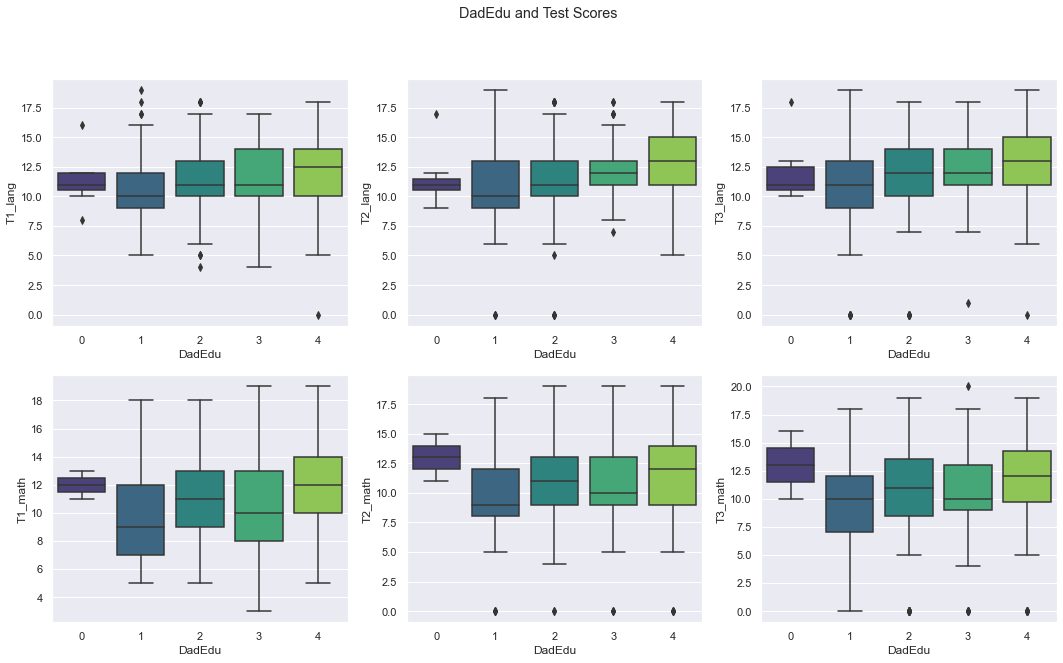

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('DadEdu and Test Scores')

sb.boxplot(ax=axes[0, 0], data=df, x='DadEdu', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='DadEdu', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='DadEdu', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='DadEdu', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='DadEdu', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='DadEdu', y='T3_math', palette='viridis')

From the plot:
- Higher level of dad education, higher the test scores
- Anomaly: Students with uneducated fathers scoring better

<AxesSubplot:xlabel='MomEdu', ylabel='T3_math'>

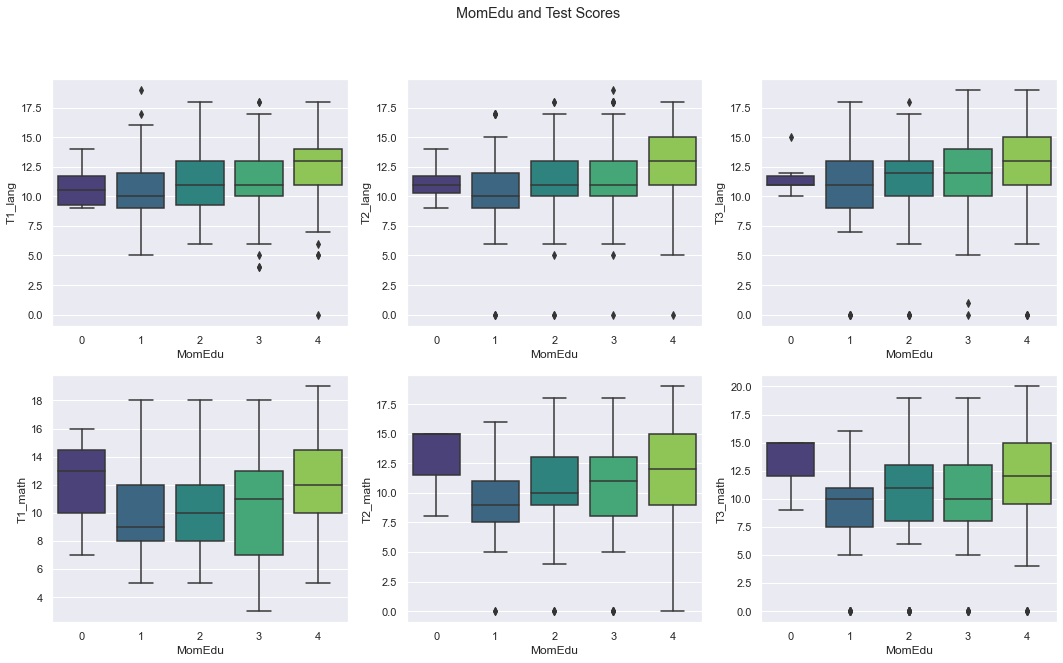

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('MomEdu and Test Scores')

sb.boxplot(ax=axes[0, 0], data=df, x='MomEdu', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='MomEdu', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='MomEdu', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='MomEdu', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='MomEdu', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='MomEdu', y='T3_math', palette='viridis')

From the plot:
- Higher level of mom education, higher the test scores
- Anomaly: Students with uneducated mothers scoring better

<AxesSubplot:xlabel='DadJob', ylabel='T3_math'>

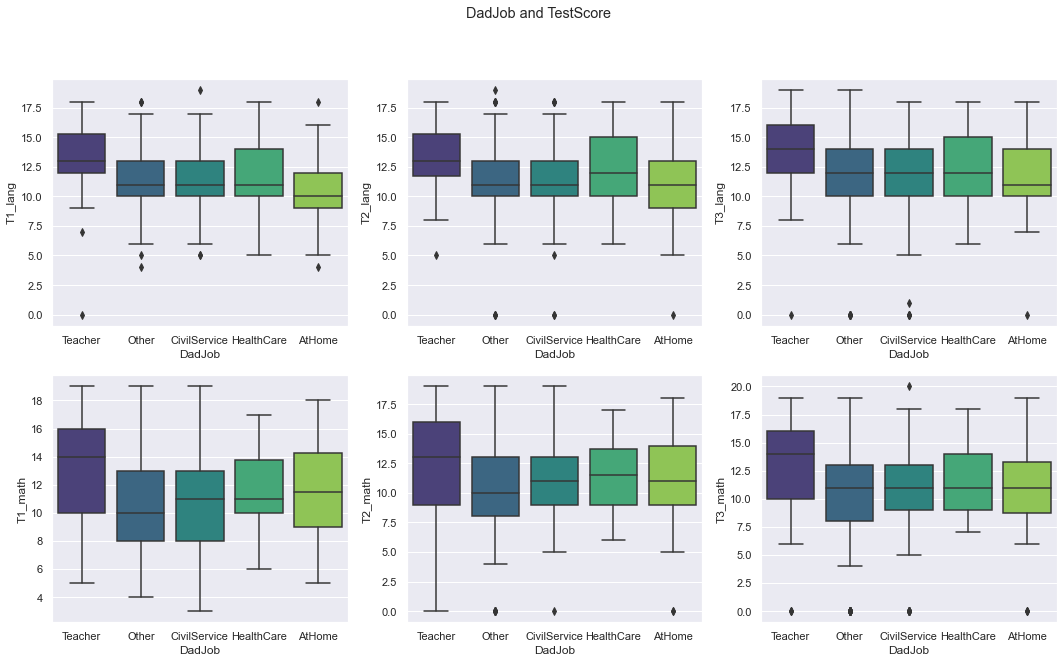

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('DadJob and TestScore')

sb.boxplot(ax=axes[0, 0], data=df, x='DadJob', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='DadJob', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='DadJob', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='DadJob', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='DadJob', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='DadJob', y='T3_math', palette='viridis')

From the plot:
- Students with fathers that are teachers score better than the rest.

<AxesSubplot:xlabel='MomJob', ylabel='T3_math'>

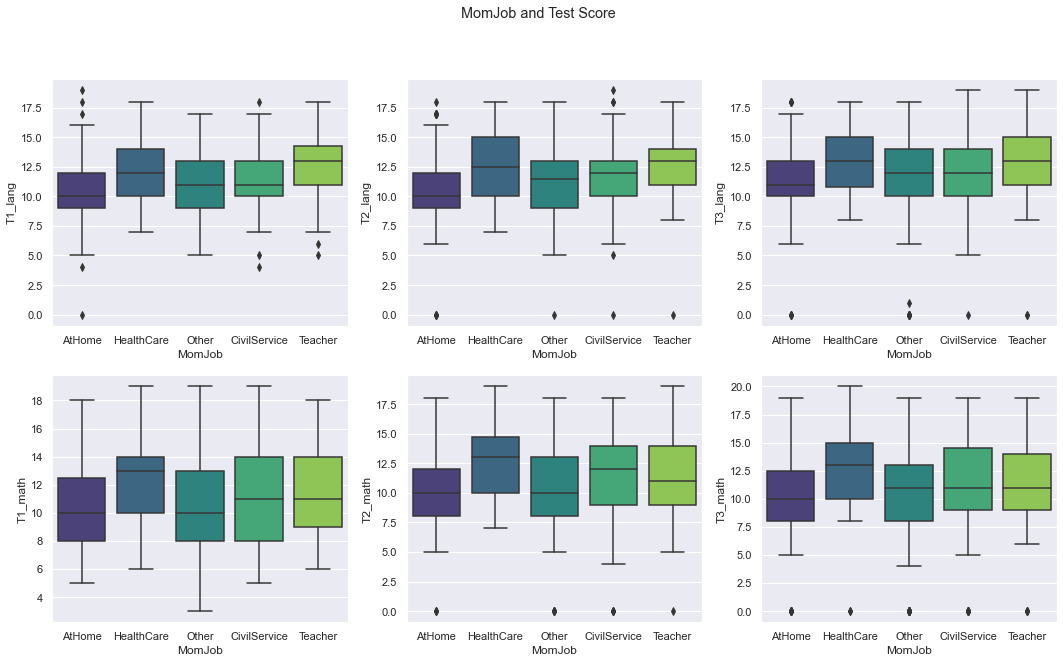

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('MomJob and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='MomJob', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='MomJob', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='MomJob', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='MomJob', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='MomJob', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='MomJob', y='T3_math', palette='viridis')

From the plot:
- Students with mothers that are teachers or healthcare workers score better than the rest

In [11]:
Healthcare = df[df["MomJob"]=="HealthCare"]

4    35
5    18
3    16
2    10
Name: FamilyRel, dtype: int64


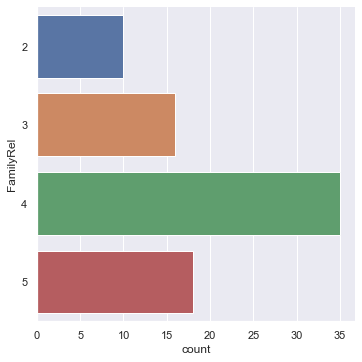

In [12]:
print(Healthcare["FamilyRel"].value_counts())
sb.catplot(y = "FamilyRel", data = Healthcare, kind = "count", height = 5)

From the plot:
- Students with mothers in the healthcare sector have good family relationships.

<AxesSubplot:xlabel='Residence', ylabel='T3_math'>

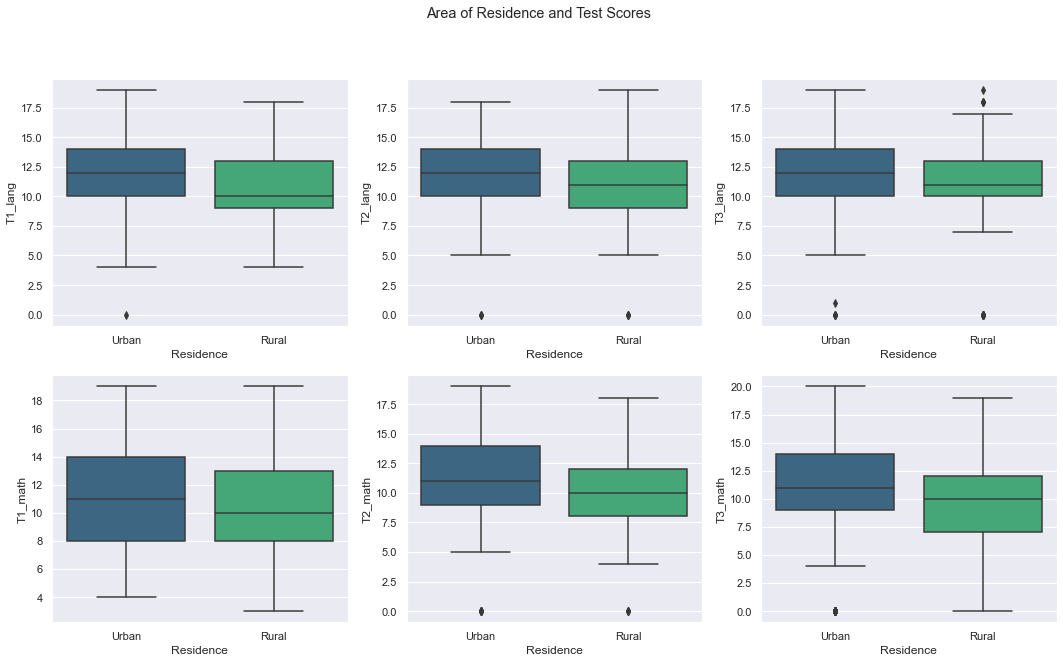

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Area of Residence and Test Scores')

sb.boxplot(ax=axes[0, 0], data=df, x='Residence', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='Residence', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='Residence', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='Residence', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='Residence', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='Residence', y='T3_math', palette='viridis')

From the plot:
- Students living in urban areas tend to have better than scores than those living in rural areas

<AxesSubplot:xlabel='Residence', ylabel='count'>

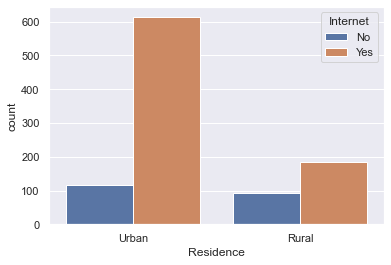

In [14]:
sb.countplot(x="Residence", hue="Internet", data=df)

From the plot:
- Larger proportion of students living in urban areas have access to the internet as compared to students living in rural areas

<AxesSubplot:xlabel='Internet', ylabel='T3_math'>

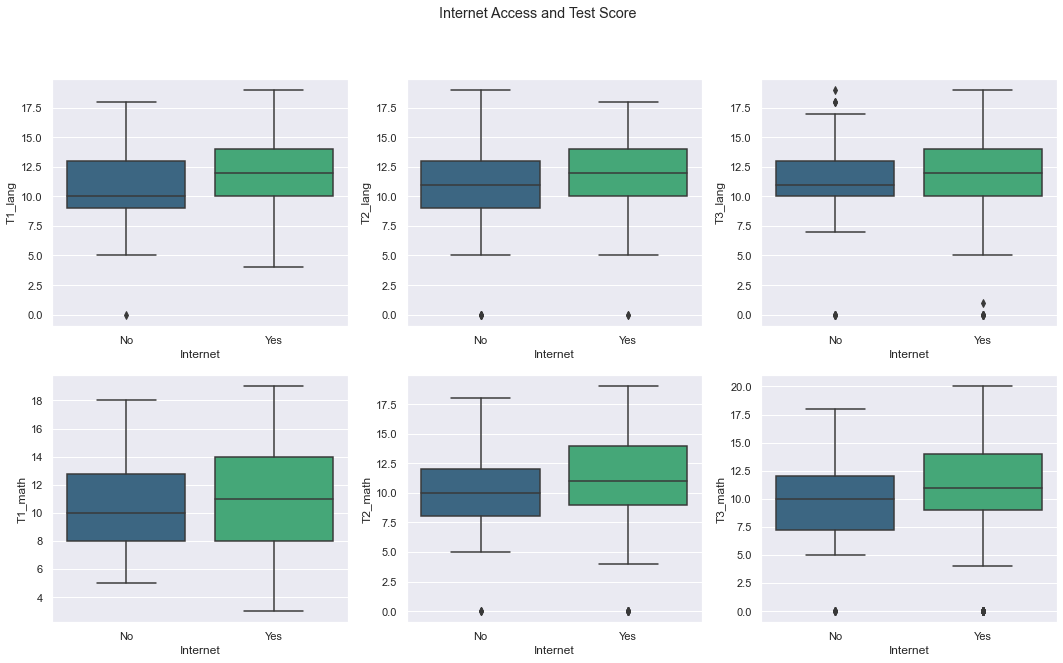

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Internet Access and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='Internet', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='Internet', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='Internet', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='Internet', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='Internet', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='Internet', y='T3_math', palette='viridis')

From the plot:
- Students with internet access score better than students who lack internet access

### EDA ON DATA RELATED TO FAMILY BACKGROUND
#### MomEdu and DadEdu
- From both MomEdu and DadEdu boxplots, it seems that Students with at least one parent that have no education seem to perform significantly better than students with parents that have higher levels of education especially for math.
- Reasons for this may include that the sample size of students with undeducated parents is too small hence leading to multiple anomalies in the results
- For parents with primary education, secondary education, and higher education, there seems to be a proportionate increase in test scores based on education level (eg. students with parents that have higher education do better than students with parents that have primary or secondary education)

#### MomJob and DadJob
- From the boxplots of the MomJob and DadJob, it seems that students with fathers that work as teachers seem to score better than their peers while students with mothers that work as teachers and healthcare workers seem to score better than the other students
- Reasons for this may be that parents that are teachers are able to better coach their child in their schoolwork as compared to other parents. 
- Furthermore, students with mothers working in the healthcare sector mostly have good family relations of 4 or 5 as seen from the catplot. This may mean that mothers working in the healthcare sector are closer to their kids and hence spend more time helping them with their schoolwork

#### Residence (related to family income)
- From the boxplot of Area of Residence and Test Score, it appears that students living in urban areas seem to perform better than their peers staying in rural areas. This may be due to the fact that a large percentage of students living in rural areas do not have access to the internet.
- As seen from the Internet Access and Test Score boxplot, students with internet access tend to perform better than students that do not have internet access. 
- According to an article published by Internet Society in 2017, the internet enables "students to extend their range of learning and "enable teachers to give more attention to individual students’ needs and support shared learning", leading to higher test scores

link: https://www.internetsociety.org/resources/doc/2017/internet-access-and-education/#:~:text=It%20can%20improve%20the%20quality,extend%20their%20range%20of%20learning.


### Effects of Family Relationship on Test Score

<AxesSubplot:xlabel='FamilyRel', ylabel='T3_math'>

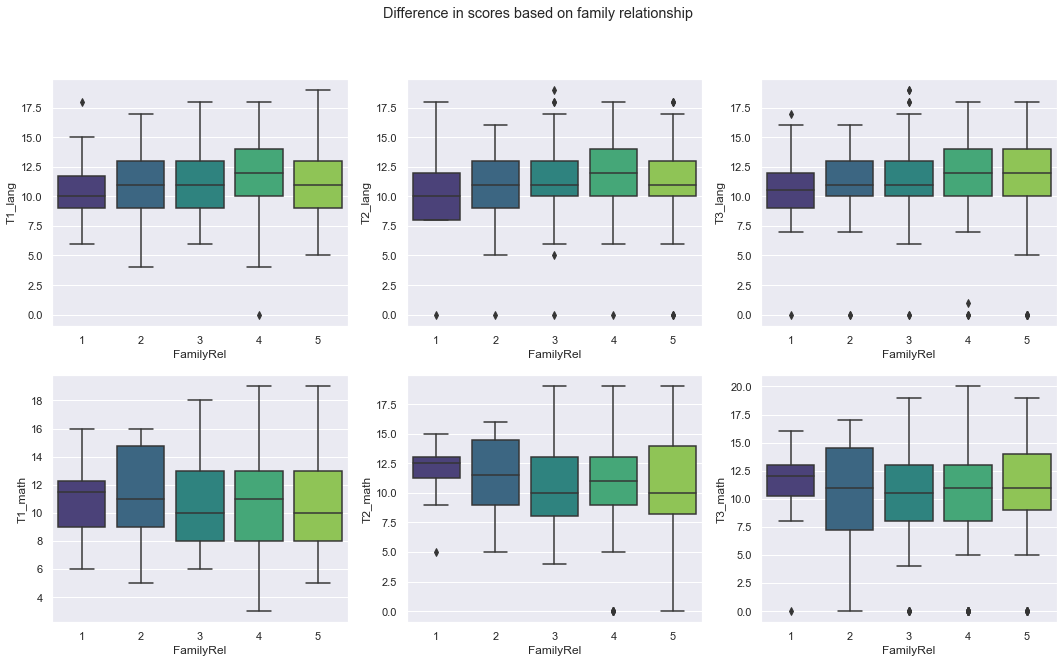

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Difference in scores based on family relationship')

sb.boxplot(ax=axes[0, 0], data=df, x='FamilyRel', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='FamilyRel', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='FamilyRel', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='FamilyRel', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='FamilyRel', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='FamilyRel', y='T3_math', palette='viridis')

From the plot:
- Better quality of family relationships, better the test scores
- Anomaly: For T2_math, students with very bad family relationships seem to do better than the rest, could be due to small sample size & students with very good family relationships seem to perform worse than the others

<AxesSubplot:xlabel='FreeTime', ylabel='count'>

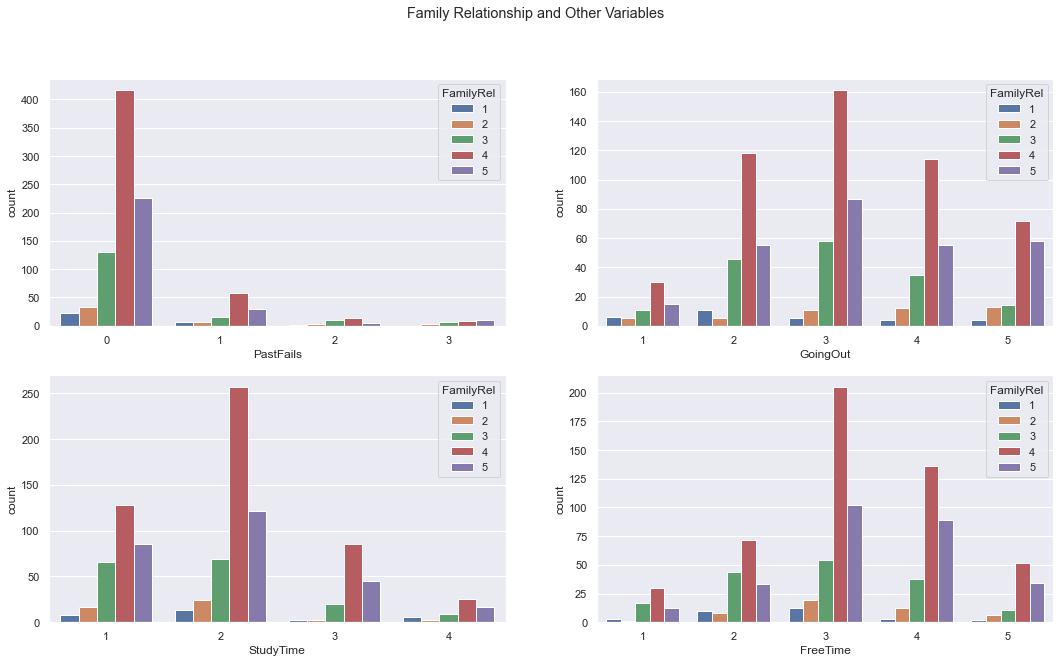

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Family Relationship and Other Variables')

sb.countplot(ax=axes[0, 0], x="PastFails", hue="FamilyRel", data=df)
sb.countplot(ax=axes[0, 1], x="GoingOut", hue="FamilyRel", data=df)
sb.countplot(ax=axes[1, 0], x="StudyTime", hue="FamilyRel", data=df)
sb.countplot(ax=axes[1, 1], x="FreeTime", hue="FamilyRel", data=df)

From the plot:
- Most students have 0 past fails
- Students with very good family relationships (FamilyRel = 5) seem to go out more often (GoingOut = 4 or 5)
- Students with very good family relationships tend to study less than 2 hours or 2-5 hours a week (StudyTime = 1 or 2)
- Students with good and very good family relationships (FamilyRel = 4 or 5) have more free time (FreeTime = 3/4/5) than the other students

<AxesSubplot:xlabel='GoingOut', ylabel='count'>

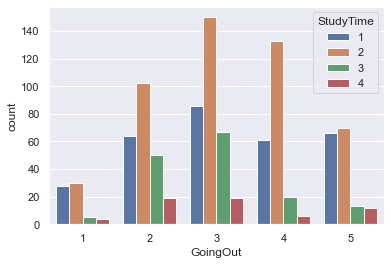

In [18]:
sb.countplot(x="GoingOut", hue="StudyTime", data=df)

From the plot:
- Majority of students who spend 5 to 10 hours or more than 10 hours (StudyTime = 3 or 4) studying, do not spend much time going out (GoingOut = 1/2/3)

In [19]:
PastFails = df[df["PastFails"]>0]

4    495
5    270
3    164
2     46
1     30
Name: FamilyRel, dtype: int64
4    79
5    45
3    34
2    13
1     7
Name: FamilyRel, dtype: int64


Text(0, 0.5, 'Percentage with PastFails (%)')

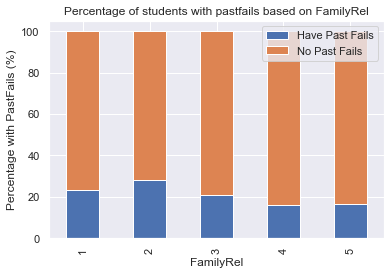

In [20]:
print(df["FamilyRel"].value_counts())
print(PastFails["FamilyRel"].value_counts())

plotdata = pd.DataFrame({
    "Have Past Fails":[7, 13, 34, 79, 45],
    "No Past Fails":[23, 33, 130, 416, 225],
    }, index=["1", "2", "3", "4", "5"]
)
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Percentage of students with pastfails based on FamilyRel")
plt.xlabel("FamilyRel")
plt.ylabel("Percentage with PastFails (%)")

From the plot: 
- A higher percentage of students with bad or very bad (1 or 2) family relationships have failed in the past compared to other students

### EDA ON DATA RELATED TO QUALITY OF FAMILY RELATIONSHIP
#### Test Scores
- The test scores of students seem to be directly proportional to the quality of their family relationship where the better the family relationship the better the test score.
- However, there is an exception for students with excellent family relationships as they seem to perform worse than the other students.
- Reasons for this may be that students with excellent family relations often spend time going out with their family as seen from the countplot where a large proportion of students with excellent family relations have GoingOut levels of 4 and 5.

#### Contributing Factors (StudyTime & GoingOut)
- In the countplot of StudyTime and GoingOut, students who go out often study less than 2 hours a week which may have contributed to the poorer test scores.

#### Family Relationship Affecting Past Failures
- Last but not least, in the barplot of percentage of students with past fails based on family relationships, it seems that a higher percentage of students with bad or very bad family relationships seem to have failed in the past as compared to students with better family relationships.
- This may be attributed to the StudyTime as well since students with very bad relations often study less than 5 hours a week or less than 2 hours.

### Effects of Family Support on Test Score

In [21]:
NoSupport = df[df["FamilySup"]=='No']
NSTest = pd.DataFrame(NoSupport[['T1_lang', 'T2_lang', 'T3_lang', 'T1_math', 'T2_math', 'T3_math']])

In [22]:
NSTest.describe()

,T1_lang,T2_lang,T3_lang,T1_math,T2_math,T3_math
count,251.000000,251.000000,251.000000,153.000000,153.000000,153.000000
mean,11.266932,11.430279,11.665339,11.261438,10.993464,10.640523
std,2.869924,3.099374,3.602160,3.433142,3.723144,4.636262
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,9.000000,9.000000,10.000000,8.000000,9.000000,9.000000
50%,11.000000,11.000000,12.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000,14.000000,13.000000,14.000000
max,19.000000,18.000000,19.000000,19.000000,19.000000,20.000000


In [23]:
Support = df[df["FamilySup"]=='Yes']
STest = pd.DataFrame(Support[['T1_lang', 'T2_lang', 'T3_lang', 'T1_math', 'T2_math', 'T3_math']])

In [24]:
STest.describe()

,T1_lang,T2_lang,T3_lang,T1_math,T2_math,T3_math
count,398.000000,398.000000,398.000000,242.000000,242.000000,242.000000
mean,11.482412,11.658291,12.057789,10.685950,10.537190,10.272727
std,2.663957,2.790560,2.967358,3.232442,3.782557,4.550318
min,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,8.000000,8.000000,8.000000
50%,11.000000,11.500000,12.000000,10.000000,10.000000,11.000000
75%,13.000000,13.000000,14.000000,13.000000,13.000000,13.000000
max,18.000000,19.000000,19.000000,19.000000,18.000000,19.000000


<AxesSubplot:xlabel='FamilySup', ylabel='T3_math'>

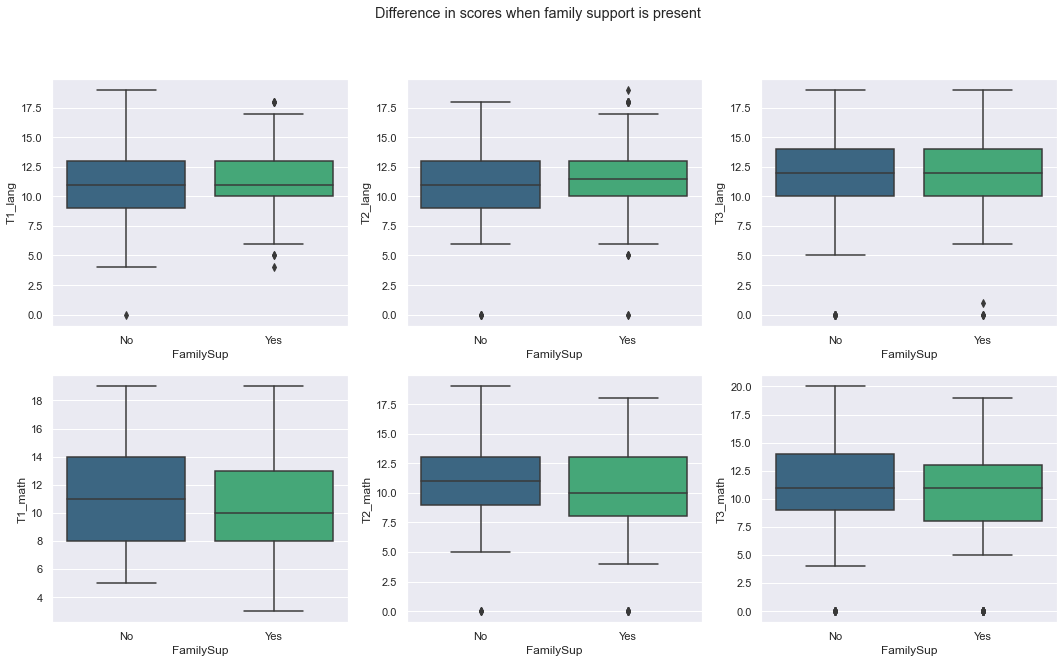

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Difference in scores when family support is present')

sb.boxplot(ax=axes[0, 0], data=df, x='FamilySup', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='FamilySup', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='FamilySup', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='FamilySup', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='FamilySup', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='FamilySup', y='T3_math', palette='viridis')

### EDA ON FAMILY SUPPORT
- Based on the box plot with family support and test scores, it appears that the test scores of students with family support and the test scores of students without family support is about the same with minimal differences hence family support does not really affect test scores

### CONCLUSION ON FAMILY BACKGROUND, RELATIONSHIP AND SUPPORT
- Family background and quality of family relationships both affect the test scores of the students while the presence of family support is not a crucial determinant of test scores

#### Family Background

- The higher the education level of the parents, the higher the test scores
- Students with parents working as teachers perform better

#### Family Relationship

- Better the quality of family relationships, higher the test scores



## What can a student do (attributes that they can control) to improve their performance in these subjects?

<AxesSubplot:xlabel='Romantic', ylabel='T3_math'>

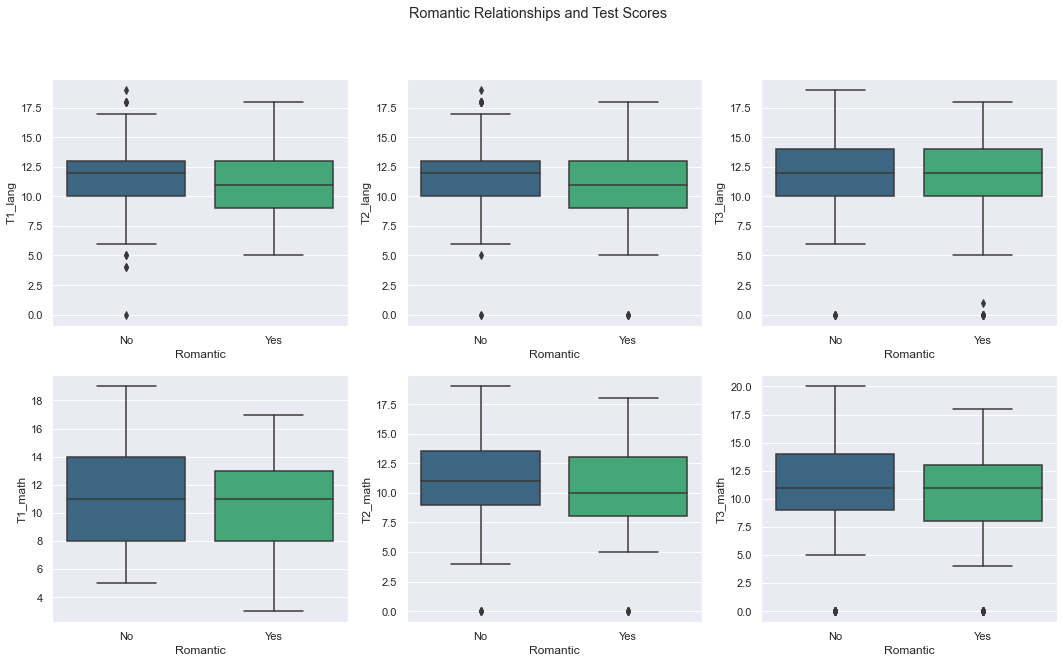

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Romantic Relationships and Test Scores')

sb.boxplot(ax=axes[0, 0], data=df, x='Romantic', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='Romantic', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='Romantic', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='Romantic', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='Romantic', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='Romantic', y='T3_math', palette='viridis')

From the plot:
- Students in romantic relationships tend to perform worse than those that are not in a romantic relationship

<AxesSubplot:xlabel='Activities', ylabel='T3_math'>

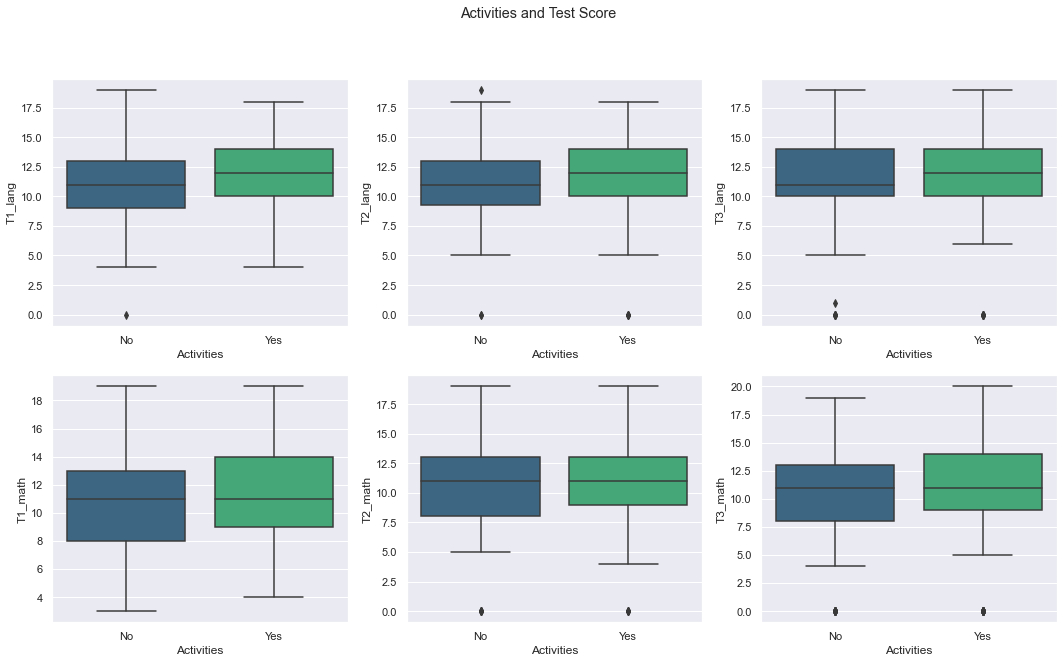

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Activities and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='Activities', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='Activities', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='Activities', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='Activities', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='Activities', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='Activities', y='T3_math', palette='viridis')

From the plot:
- Students that participate in activities score higher than those that do not

<AxesSubplot:xlabel='StudyTime', ylabel='T3_math'>

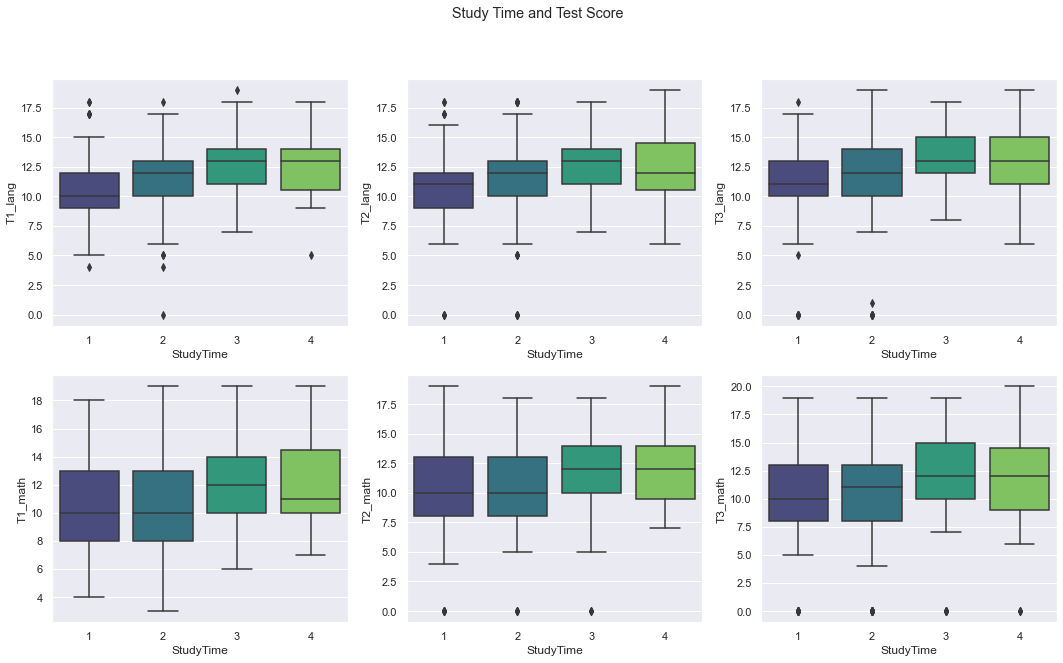

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Study Time and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='StudyTime', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='StudyTime', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='StudyTime', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='StudyTime', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='StudyTime', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='StudyTime', y='T3_math', palette='viridis')

From the plot:
- The higher the study time, the higher the test scores

<AxesSubplot:xlabel='GoingOut', ylabel='count'>

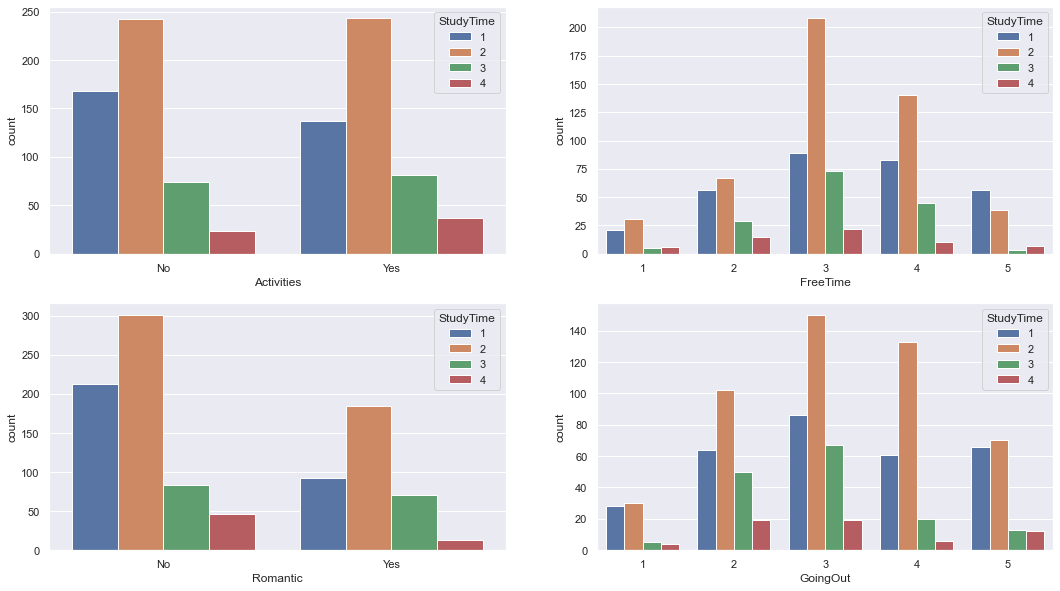

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sb.countplot(ax=axes[0, 0], x="Activities", hue="StudyTime", data=df)
sb.countplot(ax=axes[0, 1], x="FreeTime", hue="StudyTime", data=df)
sb.countplot(ax=axes[1, 0], x="Romantic", hue="StudyTime", data=df)
sb.countplot(ax=axes[1, 1], x="GoingOut", hue="StudyTime", data=df)

From the plot:
- Most students who study 5-10 hours or more than 10 hours a week participate in activities
- Students who spend more than 10 hours a week studing generally have less free time (FreeTime = 1/2/3)
- Most students who study 5-10 hours or more than 10 hours a week are not in romantic relationships
- Students who study 5-10 hours or more than 10 hours a week spend less time going out (GoingOut = 1/2/3)

<AxesSubplot:xlabel='GoingOut', ylabel='count'>

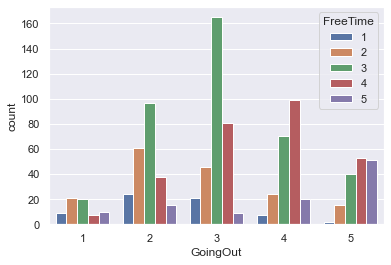

In [30]:
sb.countplot(x="GoingOut", hue="FreeTime", data=df)

From the plot:
- Students with very high free time (FreeTime = 5) usually go out the most (GoingOut = 5)

<AxesSubplot:xlabel='GoingOut', ylabel='T3_math'>

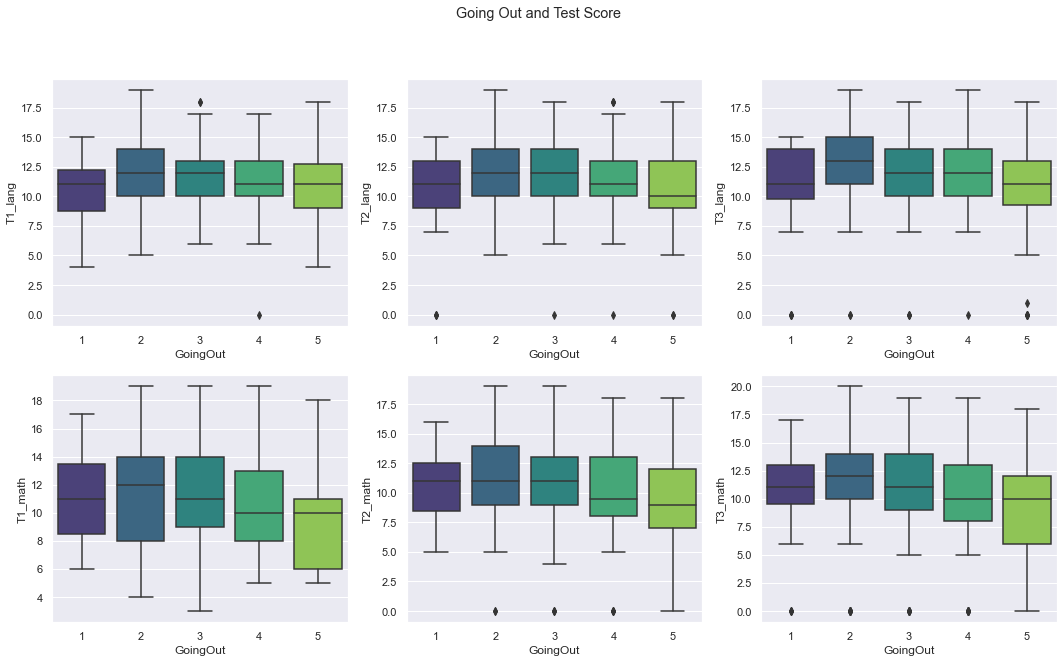

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Going Out and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='GoingOut', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='GoingOut', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='GoingOut', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='GoingOut', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='GoingOut', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='GoingOut', y='T3_math', palette='viridis')

From the plot:
- Students who go out less tend to have higher test scores

### EDA ON ROMANTIC RELATIONSHIPS, ACTIVITIES, STUDYTIME, FREETIME AND GOINGOUT
#### Romantic Relationships
- From the Romantic Relationships and Test Score boxplot, it seems that students who are single tend to perform better than students who are in relationships.
- This is further justified by the countplot with Study Time and Romantic Relationships where people who study 5-10 hours or more than 10 hours a week are mostly single.
- Reasons for this may be that students in relationships may be going out more and hence have less time to study, causing lower test scores than students who are single and may spend less time going out.

#### Co-curricular Activities
- From the activities and test score boxplot, it appears that students who participate in activities tend to score better than students who do not participate in activities.
- As mentioned in an article published by The Straits Times in 2014, "CCAs enhance educational outcomes up to a point" and "Some activities also develop academic skills, or the skills related to motivation or engagement" hence leading to better test scores.

link: https://www.straitstimes.com/singapore/enrolling-kids-in-sports-ccas-could-help-improve-studies

#### Free Time
- From the countplot of free time and study time, it appears that most students who study 2-5 hours weekly or less than 2 hours a week often have very high amounts of free time.
- Reasons for this may include that students are not spending their free time on studying.

#### Going Out
- From the boxplot of GoingOut and Test Score, it appears that students who spend more time going out score worse than those who go out less.
- As seen from the count plot, people who study 5-10 hours or more than 10 hours a week often have going out levels of either 1 or 2 which may explain why they score better than other students who go out more often.


### CONCLUSION: WHAT CAN STUDENTS TO DO IMPROVE

#### Romantic Relationships
- Students in relationships should try to plan out their time better (eg. form a schedule or study together with their partners) so as to better juggle their studies and their relationship

#### Activities
- Students may try participating in more activities since there are proven academic benefits based on the analysis above

#### Free Time & Going Out
- Students with more free time should redirect more of their time towards studying since students who study more generally achieve higher test scores
- Reduce time going out since students with more free time usually go out more than other students with less free time

## What can schools do (attributes that they can control) to help students perform better in these subjects?

### Effects of SchoolSup on Test Scores

<AxesSubplot:xlabel='SchoolSup', ylabel='T3_math'>

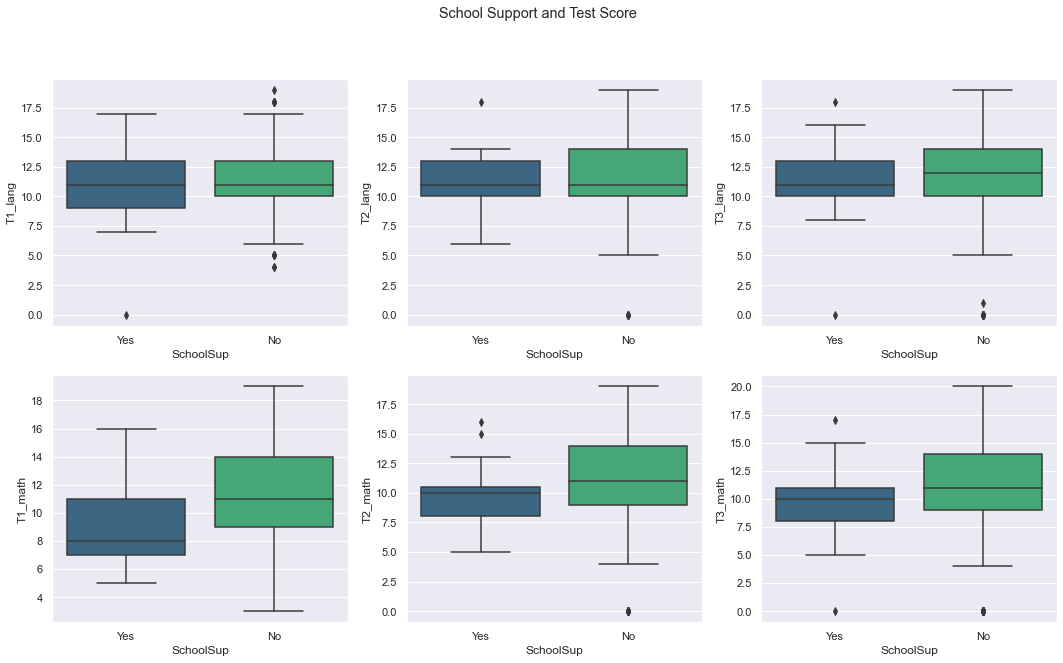

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('School Support and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='SchoolSup', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='SchoolSup', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='SchoolSup', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='SchoolSup', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='SchoolSup', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='SchoolSup', y='T3_math', palette='viridis')

From the plot:
- Students with school support tend to score better than students without school support

<AxesSubplot:xlabel='Internet', ylabel='T3_math'>

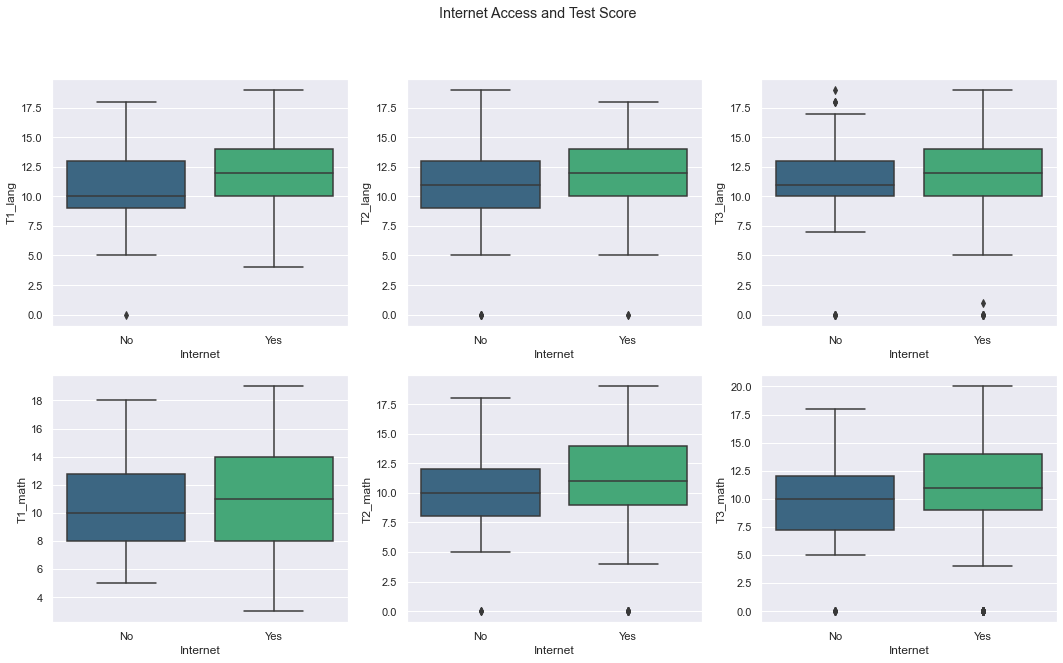

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Internet Access and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='Internet', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='Internet', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='Internet', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='Internet', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='Internet', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='Internet', y='T3_math', palette='viridis')

From the plot:
- Students with no internet tend to perform worse than students with access to the internet

<AxesSubplot:xlabel='TravelTime', ylabel='T3_math'>

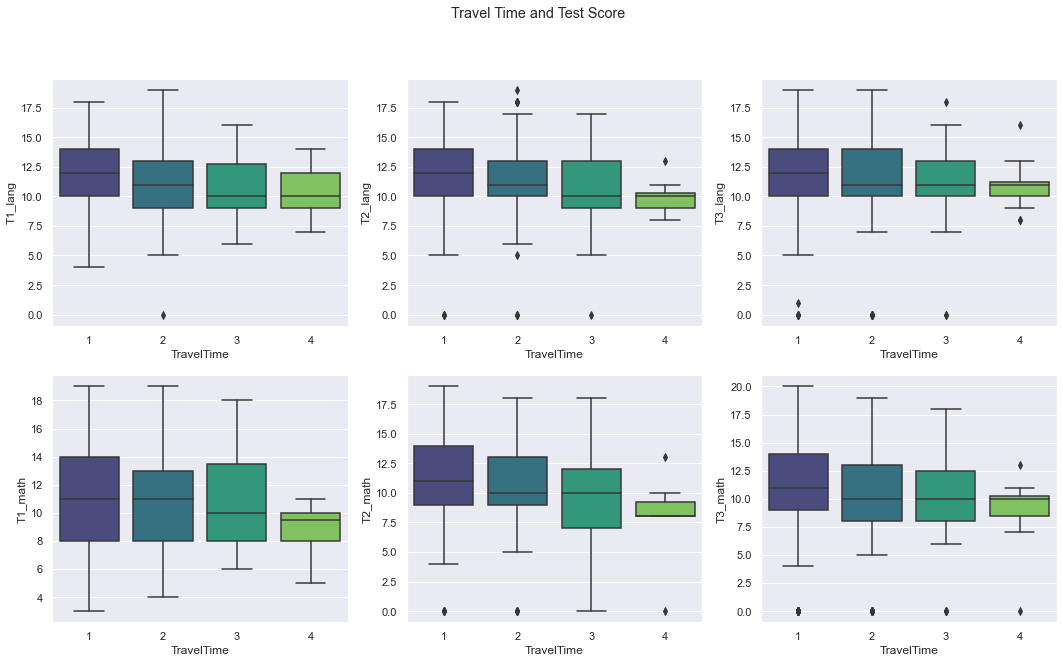

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Travel Time and Test Score')

sb.boxplot(ax=axes[0, 0], data=df, x='TravelTime', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='TravelTime', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='TravelTime', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='TravelTime', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='TravelTime', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='TravelTime', y='T3_math', palette='viridis')

From the plot:
- Students that spend less time travelling have higher test scores than those that spend more time travelling

<AxesSubplot:xlabel='TravelTime', ylabel='count'>

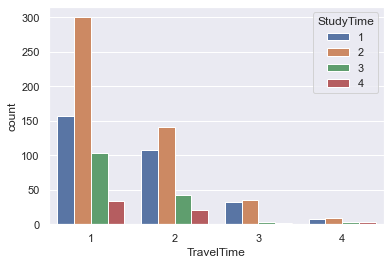

In [35]:
sb.countplot(x="TravelTime", hue="StudyTime", data=df)

From the plot:
- Students that study more than 10 hours a week usually spend less than 30 mins travelling to school

### EDA ON SCHOOL SUPPORT, INTERNET AND TRAVEL TIME
#### School Support
- From the School Support and Test Score boxplot, it appears that when school support is present, the students tend to score better as compared to when school support is not present.

#### Internet
- From the Internet and Test Score boxplot, it appears that students who have internet access tend to do better than students who do not have internet access.
- As mentioned above, this is due to the fact that students are able to extend their range of learning and teachers are able to pay more attention to the students, leading to higher test scores

#### Travel Time
- From the Travel Time and Test Score boxplot, it seems that students that spend less time travelling tend to do better in their tests than the students who spend more time travelling.
- In the countplot of Travel Time and Study Time, students who study more often spend less time travelling.
- Hence, students who spend less time travelling may be scoring better as they are spending more time studying instead.

### CONCLUSION: WHAT CAN SCHOOLS DO TO HELP STUDENTS PERFORM BETTER

#### School Support
- Schools can try to provide more school support to the students since students tend to score better for the tests when school support is present

#### Internet Access
- As some students struggle with the lack of internet, schools can provide students access to computer labs in school such that they are able to counter the lack of internet access
- Another alternative but less conventional solution would be to start a buddy system where students who lack internet access may go to the houses of students with good internet access and do their work

#### Travel Time
- Since some students spend large amounts of time travelling, schools may try to arrange special transportation to fetch them to and fro from their houses as it may cut down on their travelling time
- Schools may also consider switching to online based learning to cut travelling time completely although there are challenges in this solution such as the lack of internet access


## Which school has a better overall student performance in these two subjects? Why do you think that is?

In [36]:
df_a = df[df["School"]=="SchoolA"]
a_test = pd.DataFrame(df_a[['T1_lang', 'T2_lang', 'T3_lang', 'T1_math', 'T2_math', 'T3_math']])

In [37]:
a_test.describe()

,T1_lang,T2_lang,T3_lang,T1_math,T2_math,T3_math
count,423.000000,423.000000,423.000000,349.000000,349.000000,349.000000
mean,11.985816,12.144208,12.576832,10.939828,10.782235,10.489971
std,2.418293,2.451522,2.625636,3.319109,3.808434,4.625397
min,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000
25%,10.000000,10.000000,11.000000,8.000000,9.000000,8.000000
50%,12.000000,12.000000,13.000000,11.000000,11.000000,11.000000
75%,14.000000,14.000000,14.000000,13.000000,13.000000,14.000000
max,18.000000,19.000000,19.000000,19.000000,19.000000,20.000000


In [38]:
df_b = df[df["School"]=="SchoolB"]
b_test = pd.DataFrame(df_b[['T1_lang', 'T2_lang', 'T3_lang', 'T1_math', 'T2_math', 'T3_math']])

In [39]:
b_test.describe()

,T1_lang,T2_lang,T3_lang,T1_math,T2_math,T3_math
count,226.000000,226.000000,226.000000,46.000000,46.000000,46.000000
mean,10.300885,10.495575,10.650442,10.673913,10.195652,9.847826
std,2.979590,3.376057,3.833991,3.347001,3.377175,4.237229
min,4.000000,0.000000,0.000000,6.000000,5.000000,0.000000
25%,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000
50%,10.000000,10.000000,11.000000,10.500000,10.000000,10.000000
75%,12.000000,12.750000,13.000000,13.000000,12.750000,12.750000
max,19.000000,18.000000,19.000000,19.000000,18.000000,19.000000


<AxesSubplot:xlabel='School', ylabel='T3_math'>

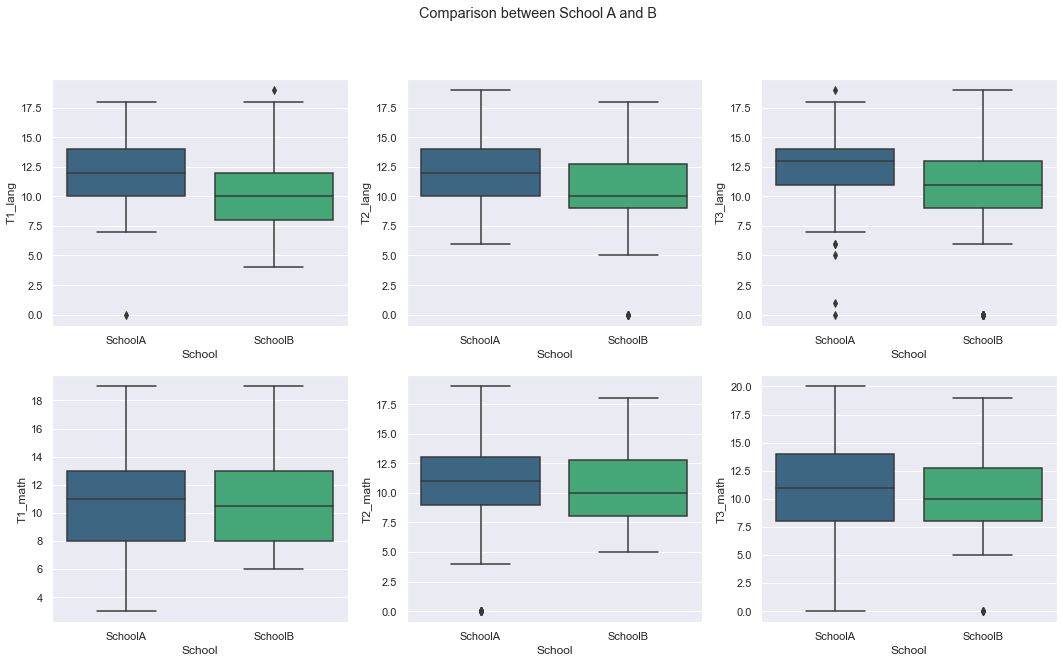

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Comparison between School A and B')

sb.boxplot(ax=axes[0, 0], data=df, x='School', y='T1_lang', palette='viridis')
sb.boxplot(ax=axes[0, 1], data=df, x='School', y='T2_lang', palette='viridis')
sb.boxplot(ax=axes[0, 2], data=df, x='School', y='T3_lang', palette='viridis')
sb.boxplot(ax=axes[1, 0], data=df, x='School', y='T1_math', palette='viridis')
sb.boxplot(ax=axes[1, 1], data=df, x='School', y='T2_math', palette='viridis')
sb.boxplot(ax=axes[1, 2], data=df, x='School', y='T3_math', palette='viridis')

From the plot:
- Students at School A score better than School B

<AxesSubplot:xlabel='Romantic', ylabel='count'>

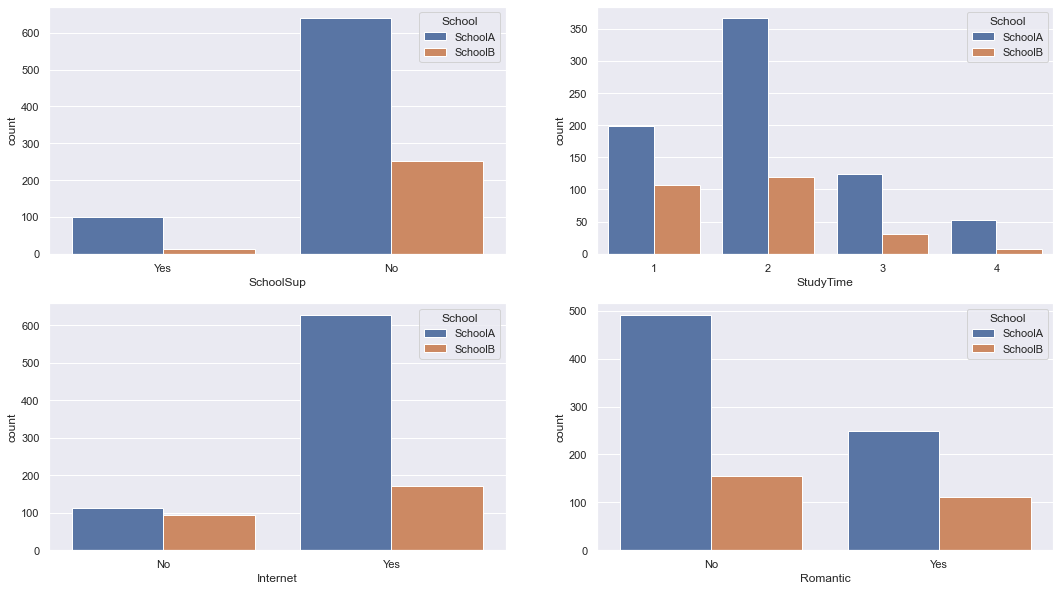

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sb.countplot(ax=axes[0, 0], x="SchoolSup", hue="School", data=df)
sb.countplot(ax=axes[0, 1], x="StudyTime", hue="School", data=df)
sb.countplot(ax=axes[1, 0], x="Internet", hue="School", data=df)
sb.countplot(ax=axes[1, 1], x="Romantic", hue="School", data=df)

From the plot:
- Only a small percentage of students in School B have School Support compared to School A
- Majority of students in School A and School B study 5 hours or less
- A large proportion of students in School B lack internet access as compared to School A
- Nearly half the School B cohort are in romantic relationships

<AxesSubplot:xlabel='Residence', ylabel='count'>

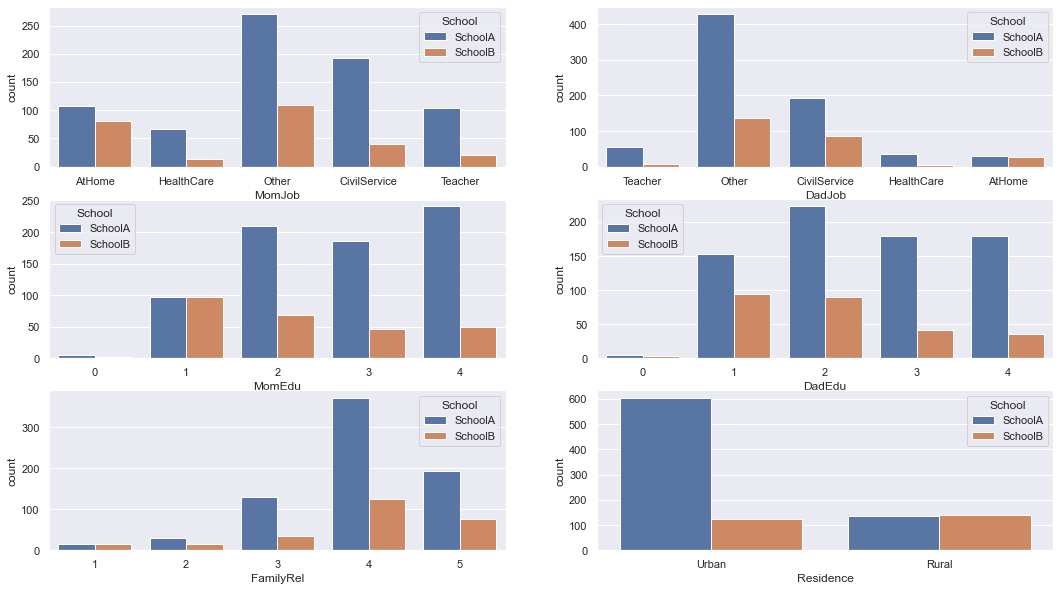

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
sb.countplot(ax=axes[0, 0], x="MomJob", hue="School", data=df)
sb.countplot(ax=axes[0, 1], x="DadJob", hue="School", data=df)
sb.countplot(ax=axes[1, 0], x="MomEdu", hue="School", data=df)
sb.countplot(ax=axes[1, 1], x="DadEdu", hue="School", data=df)
sb.countplot(ax=axes[2, 0], x="FamilyRel", hue="School", data=df)
sb.countplot(ax=axes[2, 1], x="Residence", hue="School", data=df)

From the plot:
- Majority of the mothers of the students at School A work in the civil service while majority of the mothers at School B are stay at home mothers
- Majority of fathers at Schools A and B are in the civil service industry.
- Majority of mothers at School A have higher education while majority of mothers at School B have up to primary education
- Most fathers at School A have a education up to the 5th to 9th Grade or Higher Education whereas most fathers at School B have Primary Education only
- Students at both school generally have good family relationships
- Most of the students at School B reside in rural areas while most of the students at School A reside in urban areas

### CONCLUSION: WHICH SCHOOL PERFORMED BETTER
#### General Trend
- School A seems to perform better than School B according to the boxplot above.

#### Reasons
##### School Support:
- From the countplot with School Support and School, only a small perecentage of students at School B have school support as compared to School A
- From the previous analysis of school support, students with school support tend to perform better than those who do not and hence may be the reason why School A has better test scores

##### Internet Access:
- From the countplot with Internet and School, a larger proportion of students at School B lack internet access as compared to School A
- As mentioned earlier, students with internet access tend to perform better than students who do not have access to the internet
- Hence, School B may be doing worse than School A in terms of test scores due to the lack of internet access

##### Romantic Relationships:
- From the countplot with Romantic Relationship and School, nearly half the School B cohort are in romantic relationships
- From the earlier analysis, students in romantic relationships tend to do worse than students not in romantic relationships which could have hence contributed to School B's lower test scores

##### Family Background (Dad Education)
- There is a high number of students with fathers that have Higher Education at School A
- This may have led to higher test scores for School A as compared to School B since the earlier analysis showed that the better the quality of the parent's education, the higher the test scores.

## How do the students perform over time? Are they consistent across terms, or do they gradually improve?

In [43]:
test = pd.DataFrame(df[['T1_lang', 'T2_lang', 'T3_lang', 'T1_math', 'T2_math', 'T3_math']])
test.describe()

,T1_lang,T2_lang,T3_lang,T1_math,T2_math,T3_math
count,649.000000,649.000000,649.000000,395.000000,395.000000,395.000000
mean,11.399076,11.570108,11.906009,10.908861,10.713924,10.415190
std,2.745265,2.913639,3.230656,3.319195,3.761505,4.581443
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,8.000000,9.000000,8.000000
50%,11.000000,11.000000,12.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000


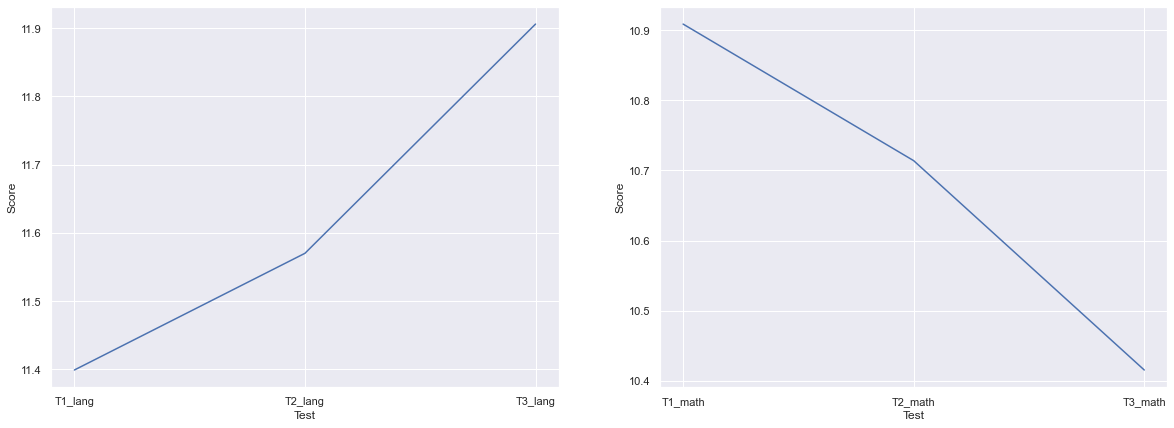

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
Test1 = ["T1_lang", "T2_lang", "T3_lang"]
Score1 = [11.399076, 11.570108, 11.906009]
Test2 = ["T1_math", "T2_math", "T3_math"]
Score2 = [10.908861, 10.713924, 10.415190]
data_plot1= pd.DataFrame({"Test":Test1, "Score":Score1})
data_plot2= pd.DataFrame({"Test":Test2, "Score":Score2})
 
sb.lineplot(ax=axes[0], x = "Test", y = "Score", data=data_plot1)
sb.lineplot(ax=axes[1], x = "Test", y = "Score", data=data_plot2)
plt.show()

### CONCLUSION: WERE STUDENTS CONSISTENT OR DID THEY IMPROVE
#### Language
- Students generally improved for the language tests across the 3 terms
- The improvement between Test 2 and Test 3 was steeper than that between Test 1 and Test 2

#### Math
- Unlike the language test, the test scores for math got worse over the 3 terms
- The decrease in score was steeper between Test 2 and Test 3 as compared to Test 1 and Test 2